In [1]:
import re 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
import os 
import sys
import datetime 
import itertools 
import math

In [3]:
import pandas_datareader.data as web
import warnings
import matplotlib as mpl


In [4]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt 
import statsmodels.api as sm
import scipy.stats as scs 

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
from ipywidgets import interactive, widgets , RadioButtons , ToggleButtons , Select , FloatSlider , FloatProgress

In [6]:
from IPython.display import set_matplotlib_formats , Image 

In [7]:
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 8)
# matplotlib overrides
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

#ARIMA FORECASTING: An autoregressive integrated moving average (ARIMA) model is an generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.

# Box-Jenkins Approach to non-Seasonal ARIMA Modeling

In time series analysis, the Box–Jenkins method,named after the statisticians George Box and Gwilym Jenkins, applies autoregressive moving average (ARMA) or autoregressive integrated moving average (ARIMA) models to find the best fit of a time-series model to past values of a time series.

The original model uses an iterative three-stage modeling approach:

Model identification and model selection: making sure that the variables are stationary, identifying seasonality in the dependent series (seasonally differencing it if necessary), and using plots of the autocorrelation and partial autocorrelation functions of the dependent time series to decide which (if any) autoregressive or moving average component should be used in the model.
Parameter estimation using computation algorithms to arrive at coefficients that best fit the selected ARIMA model. The most common methods use maximum likelihood estimation or non-linear least-squares estimation.
Model checking by testing whether the estimated model conforms to the specifications of a stationary univariate process. In particular, the residuals should be independent of each other and constant in mean and variance over time. (Plotting the mean and variance of residuals over time and performing a Ljung–Box test or plotting autocorrelation and partial autocorrelation of the residuals are helpful to identify misspecification.) If the estimation is inadequate, we have to return to step one and attempt to build a better model. The data they used were from a gas furnace. These data are well known as the Box and Jenkins gas furnace data for benchmarking predictive models.

In [8]:
data = pd.read_csv('passengers.csv',header=0, index_col=0,sep=';',parse_dates=True)

In [9]:
data.head()

,n_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
data

,n_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [11]:
y = data['n_passengers']
y_train = y[:'1958']
y_test = y['1959':]

In [12]:
y_train

month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
             ... 
1956-07-01    413
1956-08-01    405
1956-09-01    355
1956-10-01    306
1956-11-01    271
1956-12-01    306
1957-01-01    315
1957-02-01    301
1957-03-01    356
1957-04-01    348
1957-05-01    355
1957-06-01    422
1957-07-01    465
1957-08-01    467
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
1958-01-01    340
1958-02-01    318
1958-03-01    362
1958-04-01    348
1958-05-01    363
1958-06-01    435
1958

# Optimal Parameter Selection 

To fit the time series data to a seasonal ARIMA model with parameters $ARIMA(p, d, q)(P, D, Q)s$ the optimal parameters need to be found first. This is done via grid search, the iterative exploration of all possible parameters constellations. Since there is no way of doing this automatically in Python we have to resort to doing this ourselves.

Depending on the size of the model parameters $(p, d, q)(P, D, Q)s$ this can become an extremely costly task with regard to computation. We start of by generating all possible parameter constellation we'd like to evaluate.



In [13]:
p = d = q = range(0,3)

pdq= list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [14]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]


For all possible parameter constellations from both lists pdq and seasonal_pdq the alogrithm will create a model and eventually pick the best one to proceed. The best model is chosen based on the Akaike Information Criterion (AIC).

The Akaike information criterion (AIC) is a measure of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Hence, AIC provides a means for model selection.
It measures the trade-off between the goodness of fit of the model and the complexity of the model (number of included and estimated aprameters). The AIC is calculated as follows

AIC = 2k - 2ln(L)
where $k$ corresponds to the number of estimated parameters in the model and $L$ refers to the maximum value of the likelihood function for the model. It is important to note that the AIC only measures the in-sample model fit of the data given for training.

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            res = tmp_mdl.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)


Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 

Best SARIMAX[1, 1, 0]x[1, 2, 1, 12]12 model - AIC:727.3256892834611

The grid search found that the best model is a seasonal ARIMA model with ARIMA(1, 1, 0)(1, 2, 1)12 for y_test. The SARIMAX model will be trained on the training data y_train udner the optimal parameter setting optained from the grid search. If the seasonal order is not given, the standard ARIMA model will be applied to the input data.

In [15]:
mdl = sm.tsa.statespace.SARIMAX(y_train, order=(1,1,0), seasonal_order=(1,2,1,12), enforce_stationarity=True, enforce_invertibility=True)

res = mdl.fit()

print(res.aic)
print(res.summary())

727.3256892772639
                                 Statespace Model Results                                 
Dep. Variable:                       n_passengers   No. Observations:                  120
Model:             SARIMAX(1, 1, 0)x(1, 2, 1, 12)   Log Likelihood                -359.663
Date:                            Fri, 03 Aug 2018   AIC                            727.326
Time:                                    14:38:04   BIC                            738.476
Sample:                                01-01-1949   HQIC                           731.854
                                     - 12-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3570      0.091     -3.909      0.000      -0.536      -0.178
ar.S.L12      -0.

In [16]:
from scipy.stats import chi2
chi = chi2.isf(q=0.05 , df =116)
chi

142.13816003902645

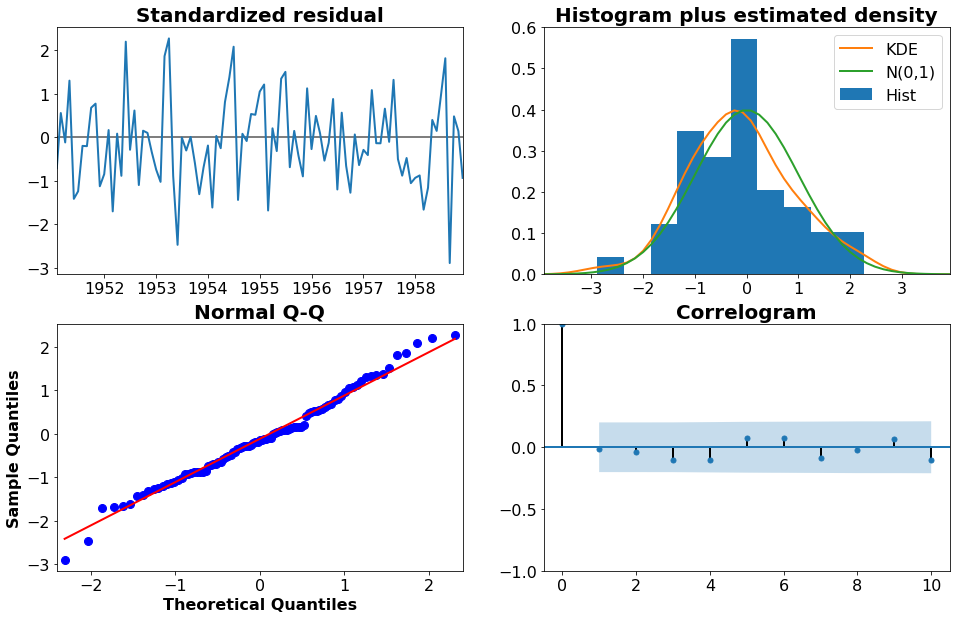

In [17]:
res.plot_diagnostics(figsize=(16,10))
plt.tight_layout
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

# One step ahead prediction 

The get_prediction and conf_int methods calculate predictions for future points in time for the previously fitted model and the confidence intervals associated with a prediction, respectively. The dynamic=False argument causes the method to produce a one-step ahead prediction of the time series

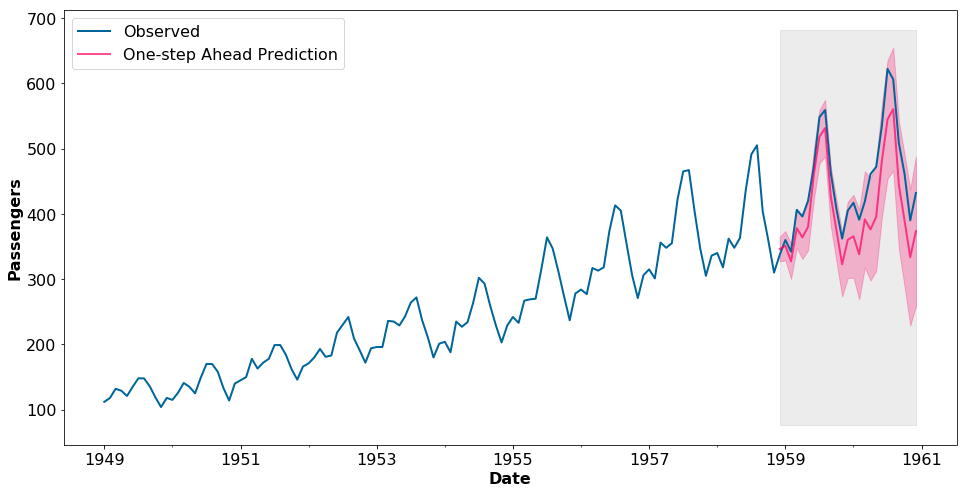

In [18]:
res = sm.tsa.statespace.SARIMAX(y_train , order=(1,1,0), seasonal_order=(1,2,1,12), enforce_stationarity=True).fit()

pred = res.get_prediction(start= pd.to_datetime('1958-12-01'), end = pd.to_datetime('1960-12-01'),dynamic = True)

pred_ci = pred.conf_int()

ax = y['1949':].plot(label='Observed', color='#006699');
pred.predicted_mean.plot(ax= ax , label ='One-step Ahead Prediction', alpha= 0.7, color ='#ff0066');

ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='#ff0066', alpha=0.25);

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-12-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('Date');
ax.set_ylabel('Passengers');
plt.legend(loc='upper left');
plt.show()

# Out of sample prediction 

In [19]:
pred_out = res.get_prediction(start=pd.to_datetime('1958-12-01'), end =('1960-12-01'),dynamic = False, full_results=True)
pred_out_ci = pred_out.conf_int()

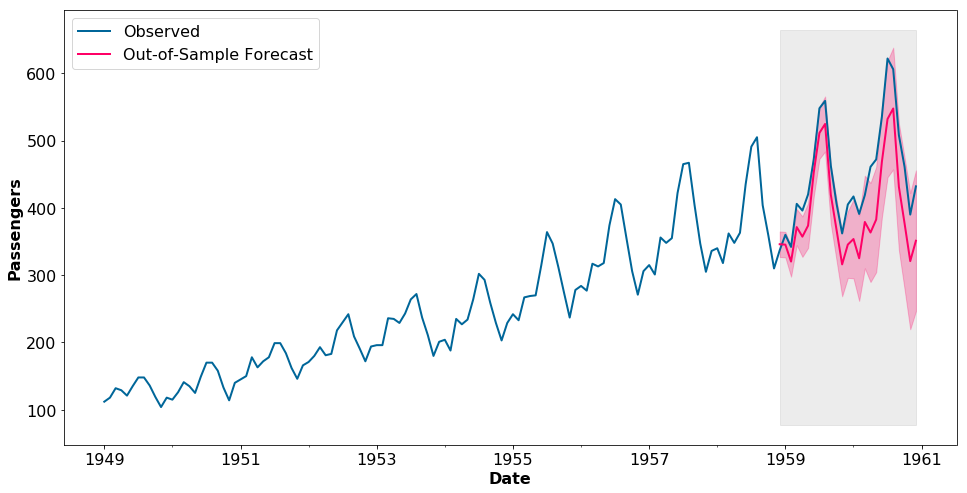

In [20]:
ax = y['1949':].plot(label='Observed', color='#006699')
pred_out.predicted_mean.plot(ax=ax, label='Out-of-Sample Forecast', color='#ff0066')
ax.fill_between(pred_out_ci.index,
                pred_out_ci.iloc[:, 0],
                pred_out_ci.iloc[:, 1], color='#ff0066', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-12-01'), y.index[-1], alpha=.15, zorder=-1, color='grey')
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

# Long Term Forecasting

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


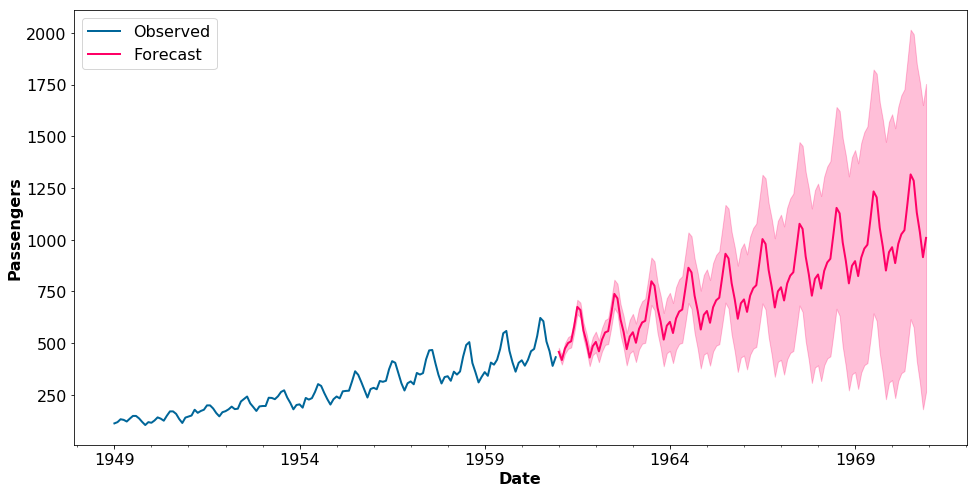

In [21]:
# build model and fit
res = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 1, 3),
                                seasonal_order=(1, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()

# get forecast 120 steps ahead in future
pred_uc = res.get_forecast(steps=120)

# get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

# plot time series and long-term forecast
ax = y.plot(label='Observed', figsize=(16, 8), color='#006699');
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='#ff0066');
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
ax.set_xlabel('Date');
ax.set_ylabel('Passengers');
plt.legend(loc='upper left')
plt.show()
